# Intro to AI - Digit Recognizer
### - With Single and Multi layer Perceptron

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Colab_Notebooks/Digit_Recognizer/digit-recognizer.zip'

Archive:  /content/drive/MyDrive/Colab_Notebooks/Digit_Recognizer/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Approach:
1. Load the data and libraries
2. Data Audit
3. Visualize the digits
4. Split the data (Train data into Train and Test)
5. Apply a Single Layer Perceptron (Sklearn)
6. Apply a Multi Layer Perceptron (Sklearn)
7. Introduce to Keras and TensorFlow
8. Hyperparameter Tuning using Keras and TF

Load the standard libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
train = pd.read_csv('train.csv')
print(f"Shape of train: {train.shape}")

test = pd.read_csv('test.csv')
print(f"Shape of test: {test.shape}")

Shape of train: (42000, 785)
Shape of test: (28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualize the entire pixels

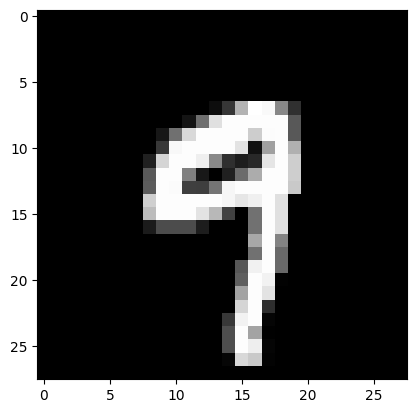

In [7]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0, 784)]
row_to_examine = 4567
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(), (28, 28))
_ = plt.imshow(image_data, cmap="gray")

In [8]:
train['label'][row_to_examine:row_to_examine+1]

4567    9
Name: label, dtype: int64

Split the data into X & Y

In [9]:
y = train['label']
X = train.iloc[:,1:]

In [10]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Split train data into train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (33600, 784)
Shape of X_test: (8400, 784)
Shape of y_train: (33600,)
Shape of y_test: (8400,)


Single Layer Perceptron

In [13]:
slp = Perceptron(verbose=1)
slp.fit(X_train, y_train)
slp_X_train_preds = slp.predict(X_train)
slp_X_test_preds = slp.predict(X_test)
print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train, slp_X_train_preds))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train, slp_X_train_preds))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test, slp_X_test_preds))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test, slp_X_test_preds))

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.57 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.62 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [14]:
slp.coef_.shape

(10, 784)

In [15]:
slp.intercept_

array([-1061.,  -213., -1456., -1105.,  -876.,   861., -1550.,  -148.,
       -3996., -1616.])

In [16]:
slp.n_iter_

27

Multi Layer Perceptron

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(64,64,64), verbose=1, random_state=123)
mlp.fit(X_train, y_train)
mlp_X_train_preds = mlp.predict(X_train)
mlp_X_test_preds = mlp.predict(X_test)
print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train, mlp_X_train_preds))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train, mlp_X_train_preds))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test, mlp_X_test_preds))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test, mlp_X_test_preds))

Iteration 1, loss = 2.97043907
Iteration 2, loss = 0.64061321
Iteration 3, loss = 0.39361608
Iteration 4, loss = 0.27993163
Iteration 5, loss = 0.21917552
Iteration 6, loss = 0.18183632
Iteration 7, loss = 0.14339127
Iteration 8, loss = 0.12192520
Iteration 9, loss = 0.10978710
Iteration 10, loss = 0.09204962
Iteration 11, loss = 0.08244479
Iteration 12, loss = 0.08523495
Iteration 13, loss = 0.07314034
Iteration 14, loss = 0.06818873
Iteration 15, loss = 0.06288960
Iteration 16, loss = 0.06222826
Iteration 17, loss = 0.05971084
Iteration 18, loss = 0.06561666
Iteration 19, loss = 0.06379533
Iteration 20, loss = 0.07029958
Iteration 21, loss = 0.07374754
Iteration 22, loss = 0.07489770
Iteration 23, loss = 0.07305251
Iteration 24, loss = 0.06430055
Iteration 25, loss = 0.05076444
Iteration 26, loss = 0.06123983
Iteration 27, loss = 0.04657423
Iteration 28, loss = 0.04588326
Iteration 29, loss = 0.04866752
Iteration 30, loss = 0.04479049
Iteration 31, loss = 0.03356253
Iteration 32, los

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128,128), verbose=1, random_state=123)
mlp.fit(X_train, y_train)
mlp_X_train_preds = mlp.predict(X_train)
mlp_X_test_preds = mlp.predict(X_test)
print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train, mlp_X_train_preds))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train, mlp_X_train_preds))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test, mlp_X_test_preds))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test, mlp_X_test_preds))

Iteration 1, loss = 2.55543329
Iteration 2, loss = 0.53109198
Iteration 3, loss = 0.29042467
Iteration 4, loss = 0.19169728
Iteration 5, loss = 0.13945993
Iteration 6, loss = 0.10064344
Iteration 7, loss = 0.09356894
Iteration 8, loss = 0.07865334
Iteration 9, loss = 0.07253773
Iteration 10, loss = 0.07228824
Iteration 11, loss = 0.08631010
Iteration 12, loss = 0.07840005
Iteration 13, loss = 0.07845803
Iteration 14, loss = 0.08808531
Iteration 15, loss = 0.07830823
Iteration 16, loss = 0.06589309
Iteration 17, loss = 0.06381795
Iteration 18, loss = 0.07820317
Iteration 19, loss = 0.07894295
Iteration 20, loss = 0.07407378
Iteration 21, loss = 0.05873148
Iteration 22, loss = 0.07043430
Iteration 23, loss = 0.05860209
Iteration 24, loss = 0.06261280
Iteration 25, loss = 0.05770280
Iteration 26, loss = 0.07818400
Iteration 27, loss = 0.06958457
Iteration 28, loss = 0.04817485
Iteration 29, loss = 0.04118404
Iteration 30, loss = 0.03236888
Iteration 31, loss = 0.05429584
Iteration 32, los

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(256,256,256), batch_size=200, max_iter=500, verbose=1, random_state=123)
mlp.fit(X_train, y_train)
mlp_X_train_preds = mlp.predict(X_train)
mlp_X_test_preds = mlp.predict(X_test)
print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train, mlp_X_train_preds))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train, mlp_X_train_preds))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test, mlp_X_test_preds))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test, mlp_X_test_preds))

Iteration 1, loss = 2.24473296
Iteration 2, loss = 0.34165695
Iteration 3, loss = 0.17677553
Iteration 4, loss = 0.11363587
Iteration 5, loss = 0.06752199
Iteration 6, loss = 0.05748951
Iteration 7, loss = 0.04232397
Iteration 8, loss = 0.04725508
Iteration 9, loss = 0.05648335
Iteration 10, loss = 0.07567312
Iteration 11, loss = 0.07947935
Iteration 12, loss = 0.09137045
Iteration 13, loss = 0.08161905
Iteration 14, loss = 0.06932269
Iteration 15, loss = 0.06581056
Iteration 16, loss = 0.06298523
Iteration 17, loss = 0.05603061
Iteration 18, loss = 0.05511924
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Training dataset ->

                 -: Confusion Matrix :-

[[3313    0    1    0    2    6    9    1    7    8]
 [   0 3712   10    0    5    0    4    0    2    2]
 [   1    6 3309    5    2    0    4    4    6    2]
 [   0    5   16 3373    0   40    3    6   31   19]
 [   0    0    1    0 3233    0    8    1    3   30]
 [   0    3    

Approach Keras:
1. Load the data (Image, Video, text, books, audio, notepads....)
2. Convert the data into Tensors/Arrays
3. Declare a Model  (Sequential/ Functional)
4. Sequence of layers (Dense, Activation, Dropout, Conv, Pooling, LSTM, RNN, Seq2Seq, Attention......)
5. Compile the model (optimizer, learning rate, batch size....)
6. fit the model (train, test, epochs, verbose)
7. Evaluate the model
8. Prediction using the model

Import the keras libraries

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

Declaring a model and layers

In [21]:
y_train_transformed = to_categorical(y_train)
y_test_transformed = to_categorical (y_test)

In [22]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim=784)) #Layer 1
model.add(Dense(128, activation = 'relu')) #Layer 2
model.add(Dense(128, activation = 'relu')) #Layer 3
model.add(Dense(10, activation = 'softmax')) #Final output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compilation of model

In [23]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Fit the model

In [24]:
y_train

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [25]:
y_train_transformed

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [26]:
hist = model.fit(X_train, y_train_transformed, validation_data=(X_test, y_test_transformed), epochs=100, verbose=2)

Epoch 1/100
1050/1050 - 6s - loss: 1.3273 - accuracy: 0.8481 - val_loss: 0.3799 - val_accuracy: 0.8992 - 6s/epoch - 5ms/step
Epoch 2/100
1050/1050 - 3s - loss: 0.2972 - accuracy: 0.9251 - val_loss: 0.3195 - val_accuracy: 0.9199 - 3s/epoch - 3ms/step
Epoch 3/100
1050/1050 - 4s - loss: 0.2111 - accuracy: 0.9433 - val_loss: 0.2625 - val_accuracy: 0.9373 - 4s/epoch - 4ms/step
Epoch 4/100
1050/1050 - 3s - loss: 0.1822 - accuracy: 0.9497 - val_loss: 0.2385 - val_accuracy: 0.9401 - 3s/epoch - 3ms/step
Epoch 5/100
1050/1050 - 3s - loss: 0.1536 - accuracy: 0.9554 - val_loss: 0.2246 - val_accuracy: 0.9423 - 3s/epoch - 3ms/step
Epoch 6/100
1050/1050 - 3s - loss: 0.1361 - accuracy: 0.9618 - val_loss: 0.1927 - val_accuracy: 0.9508 - 3s/epoch - 3ms/step
Epoch 7/100
1050/1050 - 4s - loss: 0.1215 - accuracy: 0.9648 - val_loss: 0.1593 - val_accuracy: 0.9580 - 4s/epoch - 4ms/step
Epoch 8/100
1050/1050 - 3s - loss: 0.1045 - accuracy: 0.9699 - val_loss: 0.1766 - val_accuracy: 0.9588 - 3s/epoch - 3ms/step


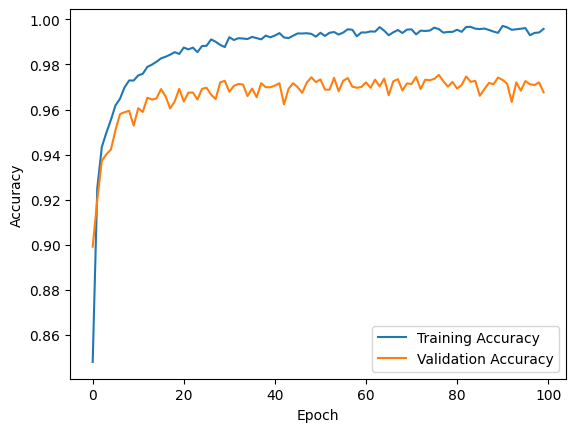

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

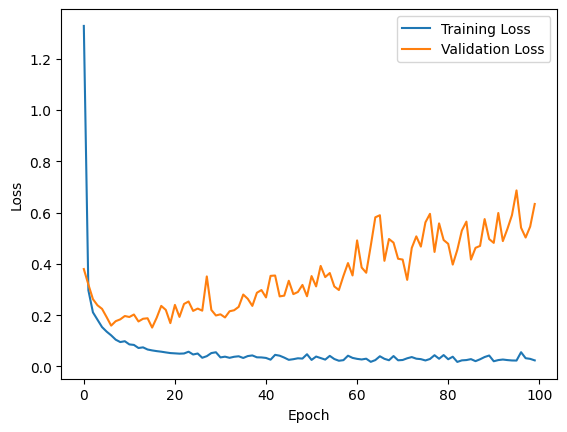

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [29]:
# prompt: predict for X_train and X_test

dense_X_train_preds = model.predict(X_train)
dense_X_test_preds = model.predict(X_test)


263/263 [==============================] - 0s 2ms/step


In [30]:
dense_X_train_preds[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
y_train_transformed[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
dense_X_train_preds_class = np.argmax(dense_X_train_preds, axis=1)
dense_X_test_preds_class = np.argmax(dense_X_test_preds, axis=1)
print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train, dense_X_train_preds_class))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train, dense_X_train_preds_class))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test, dense_X_test_preds_class))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test, dense_X_test_preds_class))


Training dataset ->

                 -: Confusion Matrix :-

[[3313    0    2    0    0    3    6    0   22    1]
 [   0 3709    1    0    0    0    0    3   22    0]
 [   0    0 3337    0    0    0    0    0    2    0]
 [   0    0    8 3449    0   32    0    0    4    0]
 [   0    0    0    0 3235    0    0    0   35    6]
 [   0    0    0    1    0 2992    0    0    2    0]
 [   1    0    0    0    0    5 3250    0   11    0]
 [   0    0    3    1    0    0    0 3533    3    1]
 [   0    0    0   11    0   10    0    1 3224    0]
 [   0    0    0    7    0    3    0    2   10 3339]]

                  -: Classification Report :-

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3347
           1       1.00      0.99      1.00      3735
           2       1.00      1.00      1.00      3339
           3       0.99      0.99      0.99      3493
           4       1.00      0.99      0.99      3276
           5       0.98      1.00

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

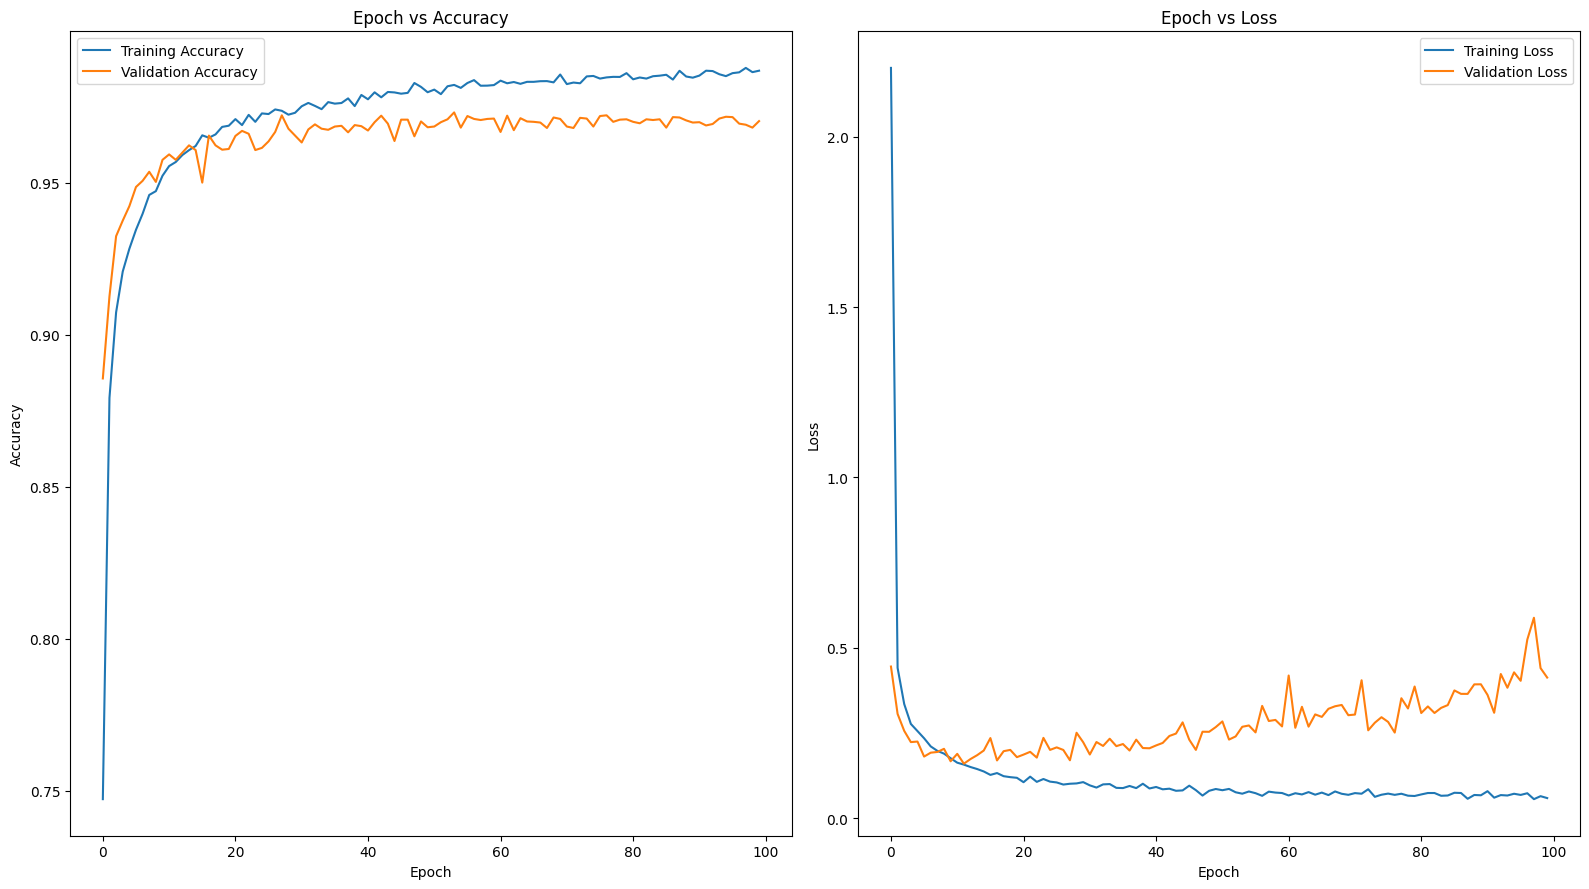

In [36]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim=784))  # Layer 1
model.add(Dropout(0.1))                                    # Dropout Layer
model.add(Dense(128, activation = 'relu'))                 # Layer 2
model.add(Dropout(0.1))                                    # Dropout Layer
model.add(Dense(128, activation = 'relu'))                 # Layer 3
model.add(Dropout(0.1))                                    # Dropout Layer
model.add(Dense(10, activation = 'softmax'))               # Final output layer
model.summary()

print("\nPlease note that: Dropout Layer don't have any weights and biases.\n")

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(X_train, y_train_transformed, validation_data=(X_test, y_test_transformed), epochs=100, verbose=2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.legend(['Training Accuracy', 'Validation Accuracy'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Epoch vs Accuracy')

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.legend(['Training Loss', 'Validation Loss'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Epoch vs Loss')

# Prevent the axis labels from slightly overlapping
fig.tight_layout()

dense_X_train_preds = model.predict(X_train)
dense_X_test_preds = model.predict(X_test)

dense_X_train_preds_class = np.argmax(dense_X_train_preds, axis=1)
dense_X_test_preds_class = np.argmax(dense_X_test_preds, axis=1)
print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train, dense_X_train_preds_class))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train, dense_X_train_preds_class))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test, dense_X_test_preds_class))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test, dense_X_test_preds_class))